# Universidad Autónoma de Yucatán

## Facultad de Matemáticas

### Machine Learning

**Teacher:** Dr. Victor Uc Cetina

**Student:** Dayan Bravo Fraga

# Logistic Regression (Binary Classification)

## Import libraries

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Import Data

In [ ]:
data_points: np.ndarray = np.loadtxt('data.txt', delimiter=' ').T
data_points

In [ ]:
data_train, data_test = train_test_split(data_points.T, test_size=.3, random_state=42)
data_train = data_train.T
data_test = data_test.T

## Plot Data Points

In [ ]:
def plot_data(print_polynomial: bool = False):
    plt.title('Data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axvline(color='black')
    plt.axhline(color='black')

    index_zeros_train = np.where(data_train[2].astype(int) == 0)
    index_ones_train = np.where(data_points[2].astype(int) != 0)
    index_zeros_test = np.where(data_test[2].astype(int) == 0)
    index_ones_test = np.where(data_test[2].astype(int) != 0)
    # Data Points Train
    plt.scatter(data_train[0][index_ones_train], data_train[1][index_ones_train], color='green', label='one_train',
                marker='o')
    plt.scatter(data_train[0][index_zeros_train], data_train[1][index_zeros_train], color='red', label='zero_train',
                marker='o')
    # Data Points Test
    plt.scatter(data_test[0][index_ones_test], data_test[1][index_ones_test], color='green', label='one_test',
                marker='x')
    plt.scatter(data_test[0][index_zeros_test], data_test[1][index_zeros_test], color='red', label='zero_test',
                marker='x')

    if print_polynomial:
        polynomial = sp.sympify(str(get_polynomial()) + ' - 0.5')
        x_ = np.linspace(-3, 3)
        y_ = [sp.solve(polynomial.subs('x', x_i)) for x_i in x_]
        plt.plot(x_, y_, label='polynomial', color='blue', linestyle='-')

    plt.legend()
    plt.grid()
    plt.show()


plot_data()

## Logistic Regression

In [191]:
def generate_thetas() -> np.ndarray:
    return np.random.uniform(low=-5, high=5, size=3)


thetas = generate_thetas()
thetas

array([ 2.67260509, -0.72337204, -2.45416708])

In [ ]:
def get_polynomial() -> sp.Expr:
    return sp.sympify(f'{thetas[0]} * x + {thetas[1]} * y + {thetas[2]}')


get_polynomial()

In [ ]:
plot_data(True)

In [ ]:
def sigmoid(x: float) -> float:
    return 1 / (1 + np.exp(-x))

In [ ]:
def h(x_vector: np.ndarray) -> float:
    return thetas.dot(x_vector)

In [ ]:
def h_activation(x_vector: np.ndarray) -> float:
    return sigmoid(h(x_vector))

In [178]:
def get_error() -> float:
    error = 0
    for data in data_train:
        yi = data[2]
        hi = h_activation(np.append(data[:2], 1))
        error += (hi - yi) ** 2
    return error / 2


get_error()

18.707161695319687

In [179]:
def get_error_rms() -> float:
    e = get_error()
    m = data_train.shape[1]
    return (2 * e / m) ** .5


get_error_rms()

0.7310884585000581

### Training

In [198]:
thetas = generate_thetas()
thetas

array([0.03493663, 0.9654974 , 2.06656002])

In [199]:
iterations_count: int = 10
a: float = .01
errors = [get_error()]


def to_train():
    for _ in range(iterations_count):
        for data in data_train.T:
            x = np.append(data[:2], 1)
            y = data[2]
            hi = h_activation(x)
            for i in range(3):  # len(thetas)
                # se actualiza el theta
                thetas[i] += a * (y - hi) * x[i]  # ^ 1
            errors.append(get_error_rms())


print('\033[92m' + 'training...' + '\033[0m')
to_train()
print('\033[92m' + 'training finished' + '\033[0m')

training...
training finished


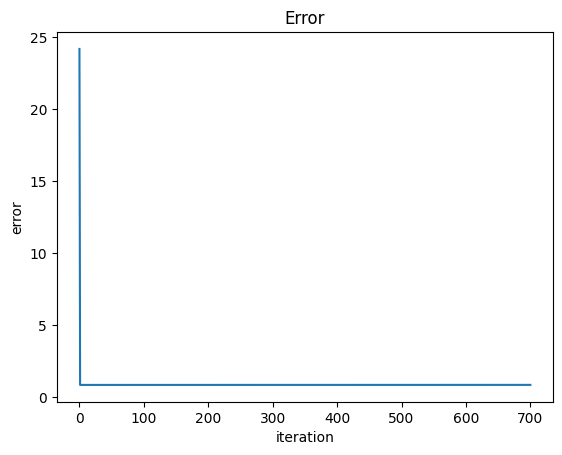

In [200]:
plt.title('Error')
plt.xlabel('iteration')
plt.ylabel('error')
plt.plot(errors)
plt.show()

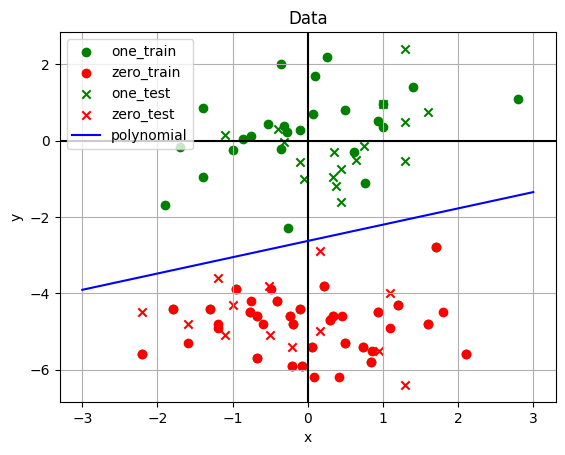

In [185]:
plot_data(True)